Chapter 11

# 旋转椭圆主轴方向的矩形
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

此代码生成一系列椭圆图，展示不同相关系数 $\rho$ 值对两个变量协方差结构的影响。

### 1. 变量定义与网格生成
- 代码首先定义了 $x$ 和 $y$ 的取值范围，并生成了二维网格 $(xx, yy)$，作为绘制等高线的基础。
- $\sigma_X = 1$ 和 $\sigma_Y = 2$ 是两个变量的标准差。
- $\rho$ 的取值范围从 $-0.8$ 到 $0.8$，以等距分成 9 个值。每个 $\rho$ 值会生成一幅椭圆图，展示不同相关系数对椭圆形状的影响。

### 2. 椭圆方程与等高线图
- 椭圆等高线的方程为：
  $$
  \text{ellipse} = \frac{\left(\frac{xx}{\sigma_X}\right)^2 - 2\rho \cdot \frac{xx}{\sigma_X} \cdot \frac{yy}{\sigma_Y} + \left(\frac{yy}{\sigma_Y}\right)^2}{1 - \rho^2} = 1
  $$
  该方程用于绘制椭圆等高线，颜色设置为蓝色 (`#0099FF`)。

### 3. 主轴与次轴的长度
主轴和次轴长度分别计算如下：
$$
\text{length\_major} = \sqrt{\frac{\sigma_X^2 + \sigma_Y^2}{2} + \sqrt{(\rho \sigma_X \sigma_Y)^2 + \left(\frac{\sigma_X^2 - \sigma_Y^2}{2}\right)^2}}
$$
$$
\text{length\_minor} = \sqrt{\frac{\sigma_X^2 + \sigma_Y^2}{2} - \sqrt{(\rho \sigma_X \sigma_Y)^2 + \left(\frac{\sigma_X^2 - \sigma_Y^2}{2}\right)^2}}
$$

### 4. 椭圆的旋转角度
椭圆的旋转角度 $\theta$ 根据 $\rho$ 值和 $\sigma_X, \sigma_Y$ 的大小确定：
$$
\theta = \frac{1}{2} \arctan \left(\frac{2 \rho \sigma_X \sigma_Y}{\sigma_X^2 - \sigma_Y^2}\right)
$$
若 $\sigma_X = \sigma_Y$ 且 $\rho \ge 0$ 时，$\theta = 45^\circ$；若 $\rho < 0$，则 $\theta = -45^\circ$。

### 5. 绘制矩形框及主次轴
- 基于 $\theta$，使用 `Affine2D()` 旋转变换定义椭圆的矩形框，其边长为 $2 \times$ 主轴和次轴长度，并旋转 $\theta$ 角度。
- 红色的两条线表示椭圆的主轴和次轴，用于展示 $\rho$ 对协方差结构的影响。

### 6. 输出图像
每幅图根据不同的 $\rho$ 值生成椭圆，展示 $\rho$ 增大或减小时，椭圆的拉伸方向和扁平程度如何变化。最终图像布局整齐，直观呈现出 $\rho$ 值对两个变量协方差结构的影响。

这段代码绘制了不同相关系数 $\rho$ 对椭圆形状和方向的影响。椭圆代表了一组变量的协方差结构，其主轴和次轴的长度及旋转角度由变量的方差和协方差确定。随着 $\rho$ 值的变化，椭圆的主轴和次轴方向、长度发生变化，体现了不同相关程度下数据分布的形态。

### 椭圆方程
椭圆的方程为：
$$
\frac{(x / \sigma_X)^2 - 2 \rho (x / \sigma_X)(y / \sigma_Y) + (y / \sigma_Y)^2}{1 - \rho^2} = 1
$$

### 主轴和次轴长度
- 主轴长度：
  $$
  \text{length}_{\text{major}} = \sqrt{\frac{\sigma_X^2 + \sigma_Y^2}{2} + \sqrt{\left( \rho \sigma_X \sigma_Y \right)^2 + \left( \frac{\sigma_X^2 - \sigma_Y^2}{2} \right)^2}}
  $$
- 次轴长度：
  $$
  \text{length}_{\text{minor}} = \sqrt{\frac{\sigma_X^2 + \sigma_Y^2}{2} - \sqrt{\left( \rho \sigma_X \sigma_Y \right)^2 + \left( \frac{\sigma_X^2 - \sigma_Y^2}{2} \right)^2}}
  $$

### 旋转角度
旋转角度 $\theta$ 为：
$$
\theta = \frac{1}{2} \arctan \left( \frac{2 \rho \sigma_X \sigma_Y}{\sigma_X^2 - \sigma_Y^2} \right)
$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
from matplotlib.transforms import Affine2D

## 准备数据

In [2]:
x = np.linspace(-4,4,num = 201)  # 创建 x 的线性空间
y = np.linspace(-4,4,num = 201)  # 创建 y 的线性空间
sigma_X = 1  # 设置 X 的标准差
sigma_Y = 2  # 设置 Y 的标准差

xx,yy = np.meshgrid(x,y)  # 创建网格数据

RHOs = np.linspace(-0.8,0.8,num = 9)  # 生成不同的相关系数值

<Figure size 3000x500 with 0 Axes>

## 绘制不同相关系数下的椭圆轮廓

C:\Users\james\AppData\Local\Temp\ipykernel_19948\151562373.py:43: RuntimeWarning: divide by zero encountered in double_scalars
  axis_major = - 1/k*X  # 计算主轴
C:\Users\james\AppData\Local\Temp\ipykernel_19948\151562373.py:43: RuntimeWarning: invalid value encountered in multiply
  axis_major = - 1/k*X  # 计算主轴


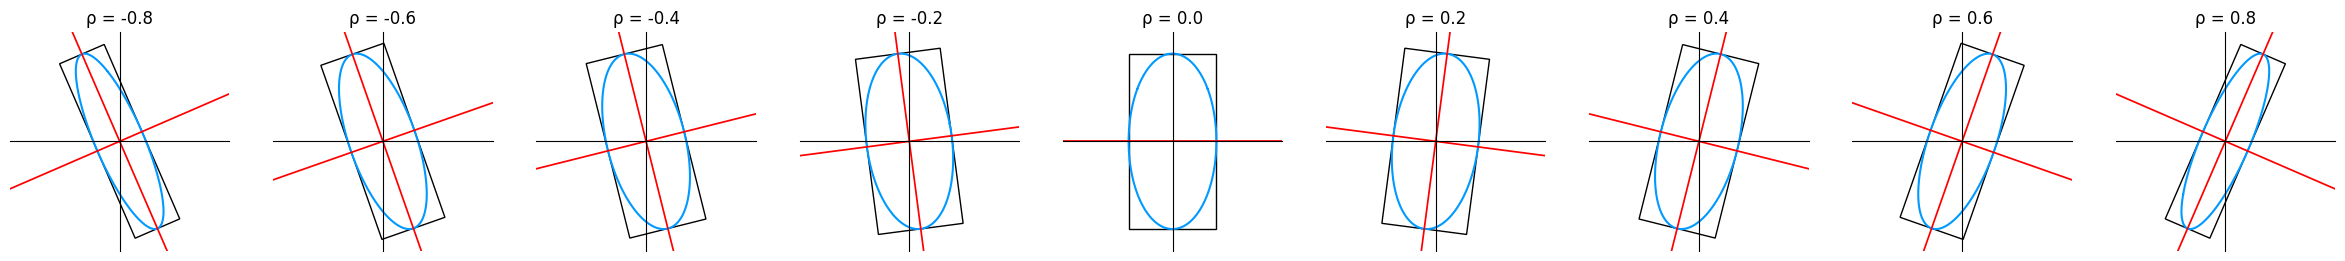

In [6]:
fig = plt.figure(figsize=(30,5))  # 设置图形尺寸

for i in range(0,len(RHOs)):
    
    rho = RHOs[i]  # 选择当前的相关系数值
    ax = fig.add_subplot(1,len(RHOs),int(i+1))  # 创建子图
    ellipse = ((xx/sigma_X)**2 - 2*rho*(xx/sigma_X)*(yy/sigma_Y) + (yy/sigma_Y)**2)/(1 - rho**2)  # 计算椭圆轮廓
    
    plt.contour(xx,yy,ellipse,levels = [1], colors = '#0099FF')  # 绘制椭圆轮廓线

    A = (sigma_X**2 + sigma_Y**2)/2  # 计算中间变量A
    B = np.sqrt((rho*sigma_X*sigma_Y)**2 + ((sigma_X**2 - sigma_Y**2)/2)**2)  # 计算中间变量B
    length_major = np.sqrt(A + B)  # 计算主轴长度
    length_minor = np.sqrt(A - B)  # 计算次轴长度
    
    if sigma_X == sigma_Y and rho >= 0:  # 判断当X和Y方差相等且相关系数非负时的角度
        theta = 45

    elif sigma_X == sigma_Y and rho < 0:  # 判断当X和Y方差相等且相关系数负数时的角度
        theta = -45
    else:
        theta = 1/2*np.arctan(2*rho*sigma_X*sigma_Y/(sigma_X**2 - sigma_Y**2))  # 计算旋转角度
        theta = theta*180/np.pi  # 将角度转换为度数
    
    if sigma_X >= sigma_Y:  # 判断并绘制主轴和次轴的方向
        rect = Rectangle([-length_major, -length_minor] , 
                         width = 2*length_major, 
                         height = 2*length_minor,
                         edgecolor = 'k',facecolor="none",
                         transform=Affine2D().rotate_deg_around(*(0,0), theta)+ax.transData)
    else:
        rect = Rectangle([-length_minor, -length_major] , 
                         width = 2*length_minor, 
                         height = 2*length_major,
                         edgecolor = 'k',facecolor="none",
                         transform=Affine2D().rotate_deg_around(*(0,0), theta)+ax.transData)
    
    ax.add_patch(rect)  # 添加矩形到子图中

    X = np.linspace(-2.5,2.5,101)  # 创建 X 的线性空间
    k = np.tan(theta/180*np.pi)  # 计算旋转角度的斜率
    axis_minor = k*X  # 计算次轴
    axis_major = - 1/k*X  # 计算主轴
    plt.plot(X,axis_minor, color = 'r', linewidth = 1.25)  # 绘制次轴
    plt.plot(X,axis_major, color = 'r', linewidth = 1.25)  # 绘制主轴

    ax.set_xlim([-2.5,2.5])  # 设置 X 轴范围
    ax.set_ylim([-2.5,2.5])  # 设置 Y 轴范围
    ax.set_xticks([])  # 隐藏 X 轴刻度
    ax.set_yticks([])  # 隐藏 Y 轴刻度
    ax.spines['left'].set_position('zero')  # 设置左侧轴位置
    ax.spines['right'].set_color('none')  # 隐藏右侧轴
    ax.spines['top'].set_position('zero')  # 设置上侧轴位置
    ax.spines['bottom'].set_color('none')  # 隐藏下侧轴
    plt.gca().set_aspect('equal', adjustable='box')  # 设置图形比例
    ax.set_title('\u03C1 = %0.1f' %rho)  # 设置标题
